In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np



/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns= boston.feature_names)


In [3]:
boston_df["PRICE"] = boston.target
y_target = boston_df["PRICE"]
X_data = boston_df.iloc[:,:-1]

In [5]:
rf = RandomForestRegressor(random_state = 0 , n_estimators = 1000)
neg_mse_scores = cross_val_score(rf,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [12]:
print(f"개별 Negative MSE scores : {np.round(neg_mse_scores),2}")
print(f"개별 RMSE scores : {np.round(rmse_scores,2)}")
print(f"평균 RMSE : {avg_rmse:0.3f}")

개별 Negative MSE scores : (array([ -8., -13., -21., -46., -19.]), 2)
개별 RMSE scores : [2.81 3.63 4.54 6.8  4.34]
평균 RMSE : 4.423


In [13]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.423 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.269 
[07:00:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:00:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:00:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:00:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:00:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.089 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.646 


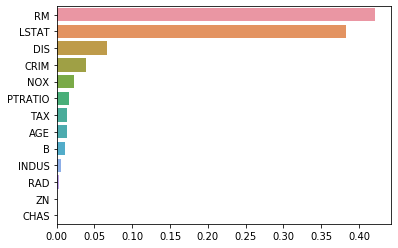

In [19]:
import seaborn as sns
%matplotlib inline
rf_reg = RandomForestRegressor(n_estimators = 1000)
rf_reg.fit(X_data,y_target)
feature_series = pd.Series(data=rf_reg.feature_importances_,index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series,y=feature_series.index)

In [22]:
boston_df_sample = boston_df[['RM',"PRICE"]]
boston_df_sample = boston_df_sample.sample(n=100,random_state=0)
print(boston_df_sample.shape)

(100, 2)


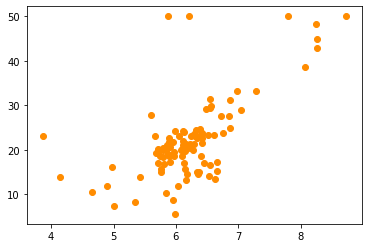

In [24]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(boston_df_sample.RM,boston_df_sample.PRICE,c="darkorange")

In [26]:
import numpy as np 
from sklearn.linear_model import LinearRegression
lr_reg =LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

X_test = np.arange(4.5,8.5,0.04).reshape(-1,1)

X_feature = boston_df_sample['RM'].values.reshape(-1,1)
y_target = boston_df_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(X_feature,y_target)
rf_reg2.fit(X_feature,y_target)
rf_reg7.fit(X_feature,y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)


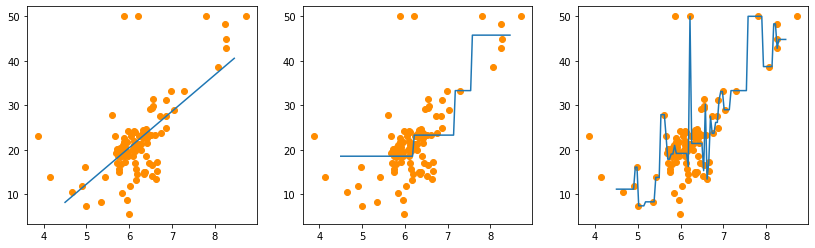

In [31]:
fig,(ax1,ax2,ax3) = plt.subplots(figsize=(14,4),ncols=3)

ax1.scatter(boston_df_sample.RM,boston_df_sample.PRICE,c="darkorange")
ax1.plot(X_test,pred_lr)

ax2.scatter(boston_df_sample.RM,boston_df_sample.PRICE,c="darkorange")
ax2.plot(X_test,pred_rf2)

ax3.scatter(boston_df_sample.RM,boston_df_sample.PRICE,c="darkorange")
ax3.plot(X_test,pred_rf7)